# Descomposición en componentes principales (PCA)

En estas notebooks vamos a explorar el hallazgo de las componentes principales en alguno de los datasets vistos en clases anteriores. La idea de componentes principales (y de muchas otras técnicas de reducción dimensional) es encontrar una combinación de los features originales que condensen gran parte de la variabilidad de nuestros datos. La utilidad de esto radica en poder:
- visualizar los datos en un espacio mucho más chico que el espacio original;
- encontrar direcciones que condensen la variación de features fuertemente correlacionados y, por lo tanto, eliminar información redundante;
- alimentar modelos de regresión o clasificación con menos variables independientes;
- comprimir información (parte 2).

La descomposición en componentes principales es parte del conjunto de algoritmos conocidos como de **aprendizaje no-supervisado**. Esto se debe a que estos algoritmos trabajan sobre el conjunto de features, sin que exista una variable que querramos predecir (variable *target*).

#### Carga de librerías


Empezamos importando la librerías usadas habitualmente:

In [ ]:
# Librerias generales y montaje del drive
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt 
import numpy as np 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importemos la clase que nos va a permitir encontrar las componentes principales, además del módulo para estandarizar nuestras variables, que suele ser una práctica habitual antes de aplicar PCA:

In [ ]:
# Clase para realizar componentes principales
from sklearn.decomposition import PCA

# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler() # Creamos el estandarizador para usarlo posteriormente

#### Dataset de departamentos en venta 

Primero vamos a analizar las componentes principales del dataset de deparmentos en venta de la Ciudad de Buenos Aires explorado en la clase de árboles de decisión (ir a la notebook correspondiente para más información de la base de datos). Comenzamos cargando el dataset:

In [ ]:
# Path de nuestro dataset
filename = '/content/drive/My Drive/LaboDatos2021/Precios_Departamentos_2016.csv'

# Carga del dataset
df = pd.read_csv(filename)

# Creabamos una nueva columna que es el logaritmo del precio
# para al final de la notebook usarla como variable a predecir
df['log10_DOLARES'] = df['DOLARES'].apply(lambda x: np.log10(x))

print('Dimensión del dataset: {}'.format(df.shape))

# Inspección de los primeros datos
df.head()

Dimensión del dataset: (2232, 9)


,M2,AMBIENTES,ANTIGUEDAD,BAÑOS,LATITUD,LONGITUD,COMUNA,DOLARES,log10_DOLARES
0,81,3,4,1,-34.581078,-58.449433,COMUNA 13,225000,5.352183
1,69,3,20,1,-34.623129,-58.439338,COMUNA 06,140000,5.146128
2,75,3,20,1,-34.604972,-58.421278,COMUNA 05,154000,5.187521
3,42,2,40,1,-34.604725,-58.399524,COMUNA 03,75000,4.875061
4,90,3,1,1,-34.623390,-58.504401,COMUNA 10,149900,5.175802


Dejemos de lado las características que utilizamos para predecir en las notebooks de árboles de decisión (precio del inmueble y comuna a cual pertenece) y seleccionemos solamente el conjunto de features:

In [ ]:
# Features que vamos a considerar
features = ['M2', 'AMBIENTES', 'ANTIGUEDAD', 'BAÑOS', 'LATITUD', 'LONGITUD']

# Matriz de numpy de los features
X = df[features].to_numpy()

print('Dimensiones de la matriz de features: {}'.format(X.shape))

Dimensiones de la matriz de features: (2232, 6)


## [Componentes principales](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

Antes de hallar las componentes principales de este dataset recordemos que una práctica habitual es la de estandarizar las variables (restándole la media y dividiendo por la desviación estándar). Esto permite eliminar una variabilidad ficticia de los datos debido al simple hecho de estar medidas en diferentes unidades:

In [ ]:
# Ajustamos el estandarizador
std_scale.fit(X)

# Aplicamos el estandarizador y obtenemos la matriz de features escaleados
X_scaled = std_scale.transform(X)

A continuación aplicamos efectivamente la descomposición en componentes principales, creando primero el modelo y luego ajustándolo a los datos:

In [ ]:
# Creación del modelo. Si el número de componentes no se específica, 
# se obtienen tantas componentes principales como features en nuestro dataset.
pca = PCA(n_components=None)

**OJO!**: si hay muchos features esto puede ser computacionalmente costoso 
y no deseado (capaz solo nos interesa las primeras componentes y por lo tanto fijar *n_components = 2* por ejemplo).

In [ ]:
# Ajustamos el modelo a los datos escaleados
pca.fit(X_scaled)

# Obtenemos la descripción de los datos en el espacio de componentes principales
X_pca = pca.transform(X_scaled)

print('Dimensiones de la matriz en componentes principales: {}'.format(X_pca.shape))
print(X_pca)

Dimensiones de la matriz en componentes principales: (2232, 6)
[[-0.56837455 -1.10637232 -0.3916625  -0.05347744  0.74735245 -0.1266752 ]
 [-0.48565345  0.61123148 -0.86931836  0.94705313  0.35082045 -0.09421212]
 [-0.31008336  0.44695051 -0.40057531  0.16071113  0.54837205 -0.12667881]
 ...
 [ 0.92969978  1.32463655 -1.6484092  -1.13543999  0.00777038  0.06440869]
 [ 0.33979861  1.3881381  -0.25341318  1.41918062  0.53966233 -0.58751633]
 [ 1.54243613  1.44755581  0.68543863 -0.38235035 -0.27447808 -0.85630495]]


La matriz anterior nos da la descripción de nuestros datos en el espacio de las 6 componentes principales.

### Fracción de varianza explicada

Uno de los detalles más interesantes de PCA es que las componentes principales están ordenadas de mayor a menor en el sentido de información que aportan. Así, la primer componente es la más informativa, la segunda aporta menos que la primera pero más que las otras, y así siguiendo. Hablar de información en este contexto es sinónimo de dar la fracción de varianza explicada por cada componente. Podemos ver cuánto aporta cada componente, como también cuánto es el acumulado de todas las componentes:

Text(0.5, 0, 'Cantidad de componentes principales')

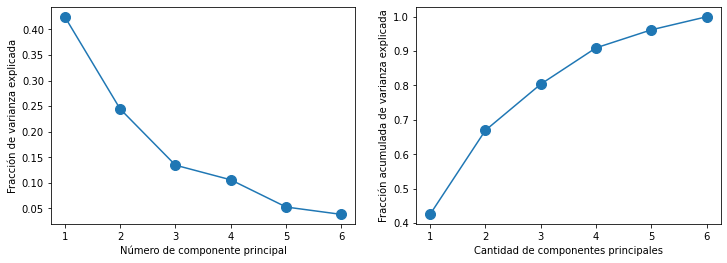

In [ ]:
# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '.-', markersize = 20)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

El gráfico de la izquierda nos dice qué fracción de información aporta cada componente. Lo que es importante notar es que cada componente aporta menos información que la anterior, por lo que las mismas están ordenadas de más a menos informativas. 

Quizás el gráfico de la derecha es más interesante: lo que nos dice es que tomando solamente las dos primeras componentes cubrimos el 70% de la información, con 3, un poco más del 80%, y así. Cuando tomamos tantas componentes como features en nuestro dataset original, no hay pérdida de información (esto simplemente se corresponde a un cambio de base del espacio de features al espacio de componentes principales).

### Interpretación de las dos primeras componentes

Una pregunta interesante que está bueno indagar es qué significan cada una de las componentes. Esta información esta contenida en la lista *.pca.components_* de nuestro modelo ya ajustado.

Veamos las primeras dos, que cubren el 70% de información de nuestros datos:

In [ ]:
print('Features = {}'.format(features))
print('PCA1 = {}'.format(pca.components_[0]))
print('PCA2 = {}'.format(pca.components_[1]))
print('PCA3 = {}'.format(pca.components_[2]))

Features = ['M2', 'AMBIENTES', 'ANTIGUEDAD', 'BAÑOS', 'LATITUD', 'LONGITUD']
PCA1 = [0.56266582 0.55799308 0.25376293 0.52826556 0.03876789 0.16458376]
PCA2 = [-0.11508626 -0.07193943  0.44632625 -0.16654079 -0.60263185  0.62567705]
PCA3 = [-0.13146324 -0.04372086  0.74606329 -0.20994345  0.61607424 -0.02391119]


Si miramos con detalle la primer componente tiene mucho peso en features tales como $m^2$, cantidad de ambientes y cantidad de baños, por lo que esta componente nos está hablando de características internas del departamento. Por otro lado, la segunda componente tiene más peso (en valor absoluto) en los features latitud y longitud, por lo que esta componente está mirando algo relacionado a la ubicación del departamento.

### Visualización de los datos en el espacio reducido

Otra ventaja que tiene PCA es que podemos utilizarlo para visualizar los datos originalmente multidimensionales en un espacio de dimensión reducida, idealmente en dos dimensiones para mayor facilidad en la interpretación. Sin embargo, tener presente que el espacio reducido tiene solo una parte de la información y que si esta es poca, la visualización puede no ser adecuada.

Vemos los datos en el espacio de las dos primeras componentes principales:

Text(0, 0.5, 'Segunda componente principal')

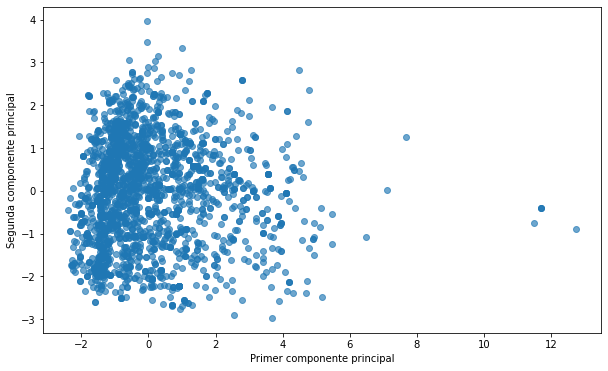

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

# Hacemos un scatter de los datos en las dos primeras componentes
ax.scatter(X_pca[:,0], X_pca[:,1], alpha = 0.65)

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

Para mayor interpretabilidad del gráfico anterior, podemos tratar de visualizar qué direcciones indican los features originales en el espacio reducido. La clave está en la matriz que da *pca.components_*: esta matriz nos dan las componentes principales en el espacio de features. Si trasponemos la matriz tenemos la descripción de los features en el espacio de las componentes principales:

In [ ]:
# Matriz de features en el espacio de componentes principales
# Simplemente la matriz traspuesta de las componentes principales en el espacio de features
features_pc = pca.components_.T

print('Descripción de la variable M2 en las componentes principales:')
print(features_pc[0])

Descripción de la variable M2 en las componentes principales:
[ 5.62665824e-01 -1.15086256e-01 -1.31463244e-01 -6.27641197e-04
  3.48560037e-01  7.28961759e-01]


Realizamos el mismo gráfico que antes, pero ahora indicamos las direcciones de las features originales en el espacio de las componentes principales:

Text(0, 0.5, 'Segunda componente principal')

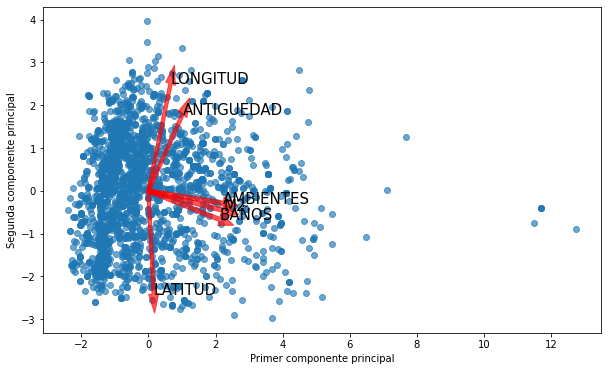

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

# Hacemos un scatter de los datos en las dos primeras componentes
ax.scatter(X_pca[:,0], X_pca[:,1], alpha = 0.65)

# Hacemos el grafico de las flechas indicando las direcciones de los features originales

sf = 4 # Factor de escala solo a efecto de estirar 
       # las flechas para que sean visibles (solo nos importa la dirección en realidad)

# Recorremos cada feature
for i in range(len(features)):

  # Creamos una flecha que vaya del origen y apunte en la dirección de los features
  ax.arrow(0, 0, sf * features_pc[i][0], sf * features_pc[i][1], width = 0.1, color = 'r', alpha = 0.65)

  # Indicamos con texto a qué feature corresponde cada flecha
  ax.text(sf * features_pc[i][0], sf * features_pc[i][1], s = features[i], fontdict= {'color': 'k', 'size': 15})

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

Lo que vemos en el gráfico es lo mismo que mencionamos más arriba: los features relacionados con características del inmueble son prácticamente paralelas a la primer componente, mientras que los features relacionados con la ubicación son prácticamente paralelos a la segunda componente.

### Regresión con componentes principales

La descripción de nuestros features en el espacio reducido de las primeras componentes principales puede ser utilizado como input para diferentes modelos. En particular, para el caso del modelo de regresión lineal, recordemos que las variables independientes no debían ser colineales (es decir, una no debía poder escribirse como una combinación lineal de otras). Dado que las componentes principales son por construcción ortogonales, son por defecto buenas candidatas para formar parte de un modelo de regresión. 

Podemos, por ejemplo, hacer una regresión respecto de los datos en el espacio bidimensional más informativo (recordemos primero escaleamos nuestros datos):

In [ ]:
# Importemos por ejemplo el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

# Fijamos la variable relacionada con el precio como variable target
y = df['log10_DOLARES'].to_numpy()

# Escaleamos nuestras variables
std_scale.fit(X)
X_scaled = std_scale.transform(X)

# Describimos nuestros datos en el espacio 2D de componentes principales
pca = PCA(n_components = 2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# Creamos el modelo 
reg = LinearRegression()

# Ajustamos con la matriz de nuestros datos en componentes principales
reg.fit(X_pca, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

No hacemos mucho más con esto, solo mostrar una posible aplicación. Aquí hicimos una regresión con los datos descritos en el espacio de las dos primeras componentes principales, pero podemos tomar la cantidad de componentes como un hiperparámetro de nuestro modelo (y por lo tanto, ser elegido mediante cross-validation). Notar la ventaja de contar con una variable *target* (es decir, entrar en un problema de aprendizaje supervisado) con la cual entrenar el modelo: su presencia nos permite hacer algún proceso de validación y por lo tanto tener un criterio para elegir la cantidad óptima de componentes principales.

**Observación**: scikit-learn tiene implementado un modelo denominado [*Principal Components Regression*](https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html?highlight=principal%20component%20regression) que automatiza este proceso de hacer regresión sobre las componentes principales obtenidas de un conjunto de features.

## Cosas para llevarse de esta notebook 

Cuando tenemos un conjunto de $n$ datos descritos por una matriz de $n \times m$, donde $m$ es la cantidad de features, muchas veces vamos a querer describirlos en un espacio de dimensión $p$, donde en general $p \ll m$. Una técnica para hacer esto es descomponer en componentes principales (PCA). 

Para ello, creamos primero el modelo con:
~~~
from sklearn.decomposition import PCA

pca = PCA(n_components = p)
~~~
Para ajustar con nuestra matriz de datos por features hacemos: 
~~~
pca.fit(X)
~~~
En general, suele ser una buena práctica escalear los datos antes, sobre todo si los features representan diferentes observables, cada uno de ellos con una unidad de medida diferente:
~~~
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

std_scale.fit(X)

X_scaled = std_scale.transform(X)

# Ajustamos pca sobre la matriz escaleada
pca.fit(X_scaled)
~~~

Una vez halladas las componentes principales podemos ver la matriz de datos descritos en el espacio (en general reducido):
~~~
X_pca = pca.transform(X_scaled)
~~~
y la descripción de las componentes en el espacio de los features originales:
~~~
print(pca.components_)
~~~
Finalmente, podemos ver la cantidad de información contenida en cada componente y calcular la información acumulada, respectivamente, con:
~~~
import numpy as np 

print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))
~~~